<a href="https://colab.research.google.com/github/Nurochman79/DataScience/blob/main/Case_Booking_Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This case study has objective to analyst the corelation between "lead time" and "reservation month". How strong the corelation is. Is there any specific month that has certain lead time?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import matplotlib.rcParams['figure.figsize']=(12,8)
from matplotlib.ticker import MultipleLocator
plt.style.use('ggplot')
import seaborn as sns

In [ ]:
import matplotlib
print ('versi seaborn', sns.__version__)
print ('versi matplotlib', matplotlib.__version__)

versi seaborn 0.12.2
versi matplotlib 3.7.1


In [ ]:
pip install pandas

In [ ]:
missing_value_format = ['N.A', 'na', 'n.a.', 'n/a', '?', '-']

In [ ]:
hr_data=pd.read_csv('/content/sample_data/HR_comma_sep (1).csv')

In [ ]:
hr_data.shape

(14999, 10)

In [ ]:
hr_data.describe

<bound method NDFrame.describe of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2    

In [ ]:
hr_data.head (10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
left = hr_data.groupby('left')
left.mean()

<ipython-input-9-3c5bfb297b4d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  left.mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [ ]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


1. DATA CLEANING

We have to check dataframe for finding the missing value and duplicate data.

In [ ]:
dfbh.isnull().sum()

In [ ]:
dfbh.isna().sum().to_frame

In [ ]:
round(dfbh['company'].isna().sum()*100/len(dfbh['company']),2)

94.31

In [ ]:
round(dfbh['agent'].isna().sum()*100/len(dfbh['agent']),2)

13.69

In [ ]:
dfbh.duplicated().any()

False

We found missing values in "children","cauntry", "agent", and "company" coluomns but no dupilcates data. We will replace missing values/NAN with modus in each coluomns except 'company' coluomn that have to drop because 94% is NA .

In [ ]:
dfbh['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
dfbh['country'].fillna('PRT', inplace=True)

In [ ]:
dfbh['country'].isna().sum()

0

In [ ]:
dfbh['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [ ]:
dfbh['agent'].fillna(9.0, inplace=True)

In [ ]:
dfbh['agent'].isna().sum()

0

Missing value in coluomns "children" will be droped due to little number. And also 'Company' coluomn will be droped (too many NA).



In [ ]:
dfbh.dropna(subset=['children'], axis=0, inplace=True)

In [ ]:
dfbh.drop('company',axis=1, inplace=True)

In [ ]:
dfbh.info()

Dataframe already clean, no missing value/NAN.

In [ ]:
dfbh.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
days_in_waiting_list              False


In [ ]:
dfbh.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

We have removed 4 rows data(119390--->119386) and 1 column data (36--->35) in dataframe. We have to reset the indexs.

In [ ]:
dfbh.shape

(119386, 35)

In [ ]:
dfbh.reset_index(drop=True, inplace=True)

Now we have to check the type of data in this dataframe

In [ ]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119386 entries, 0 to 119385
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal            

Data pre-processing for coloumn "arrival_date_month".

In [ ]:
dfbh['arrival_date_month'].value_counts()

August       13873
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Doing tranform data nominal to numeric, for example "July ---> 7"

In [ ]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('January','1')
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('February','2')
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('March','3')
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('April','4')
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('May','5')
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('June','6')
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('July','7')
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('August','8')
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('September','9')
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('October','10')
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('November','11')
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('December','12')

In [ ]:
dfbh['arrival_date_month'].value_counts()

8     13873
7     12661
5     11791
10    11160
4     11089
6     10939
9     10508
3      9794
2      8068
11     6794
12     6780
1      5929
Name: arrival_date_month, dtype: int64

We need change data type in coloumn "arrival_data_month from
 "Object" to "int"


In [ ]:
dfbh=dfbh.astype({'arrival_date_month':'int'})

In [ ]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119386 entries, 0 to 119385
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  int64  
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal            

In [ ]:
cuts=['hotel','meal','market_segment','distribution_channel','reserved_room_type','assigned_room_type',
'deposit_type','customer_type','reservation_status','reservation_status_date','name','email',
'phone-number']

In [ ]:
nums=['is_canceled','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number',
      'arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children',
      'babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
      'booking_changes','agent','days_in_waiting_list','adr','required_car_parking_spaces',
      'total_of_special_requests']

In [ ]:
dfbh[nums].head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,7,27,1,0,0,2,0.0,0,0,0,0,3,9.0,0,0.0,0,0
1,0,737,2015,7,27,1,0,0,2,0.0,0,0,0,0,4,9.0,0,0.0,0,0
2,0,7,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,9.0,0,75.0,0,0
3,0,13,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0
4,0,14,2015,7,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1


In [ ]:
dfbh[cuts].head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number
0,Resort Hotel,BB,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661
1,Resort Hotel,BB,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955
2,Resort Hotel,BB,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745
3,Resort Hotel,BB,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427
4,Resort Hotel,BB,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883


In [ ]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119386 entries, 0 to 119385
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  int64  
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal            

In [ ]:
dfbh_nums=dfbh.copy()
dfbh_nums

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119381,City Hotel,0,23,2017,8,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119382,City Hotel,0,102,2017,8,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119383,City Hotel,0,34,2017,8,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119384,City Hotel,0,109,2017,8,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [ ]:
dfbh_nums.shape

(119386, 35)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprec

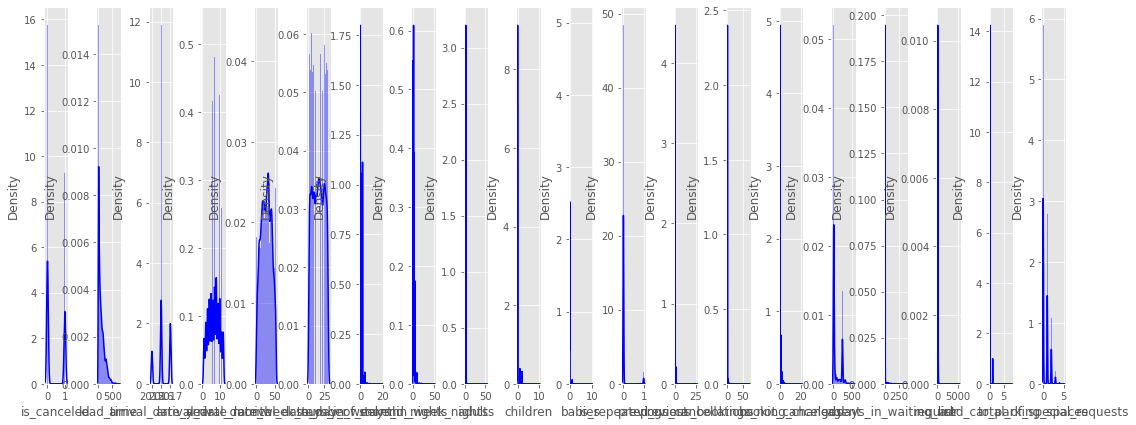

In [ ]:
from seaborn.distributions import distplot
features=nums
plt.figure(figsize = (15,6))
for i in range(0, len(features)):
  plt.subplot(1,20,i+1)
  sns.distplot(x=dfbh[features[i]], color='blue')
  plt.xlabel(features[i])
  plt.tight_layout()

In [ ]:
dfbh_nums.drop(columns=['hotel','meal','market_segment','distribution_channel','reserved_room_type','assigned_room_type',
'deposit_type','customer_type','reservation_status','reservation_status_date','name','email',
'phone-number','credit_card'], axis=1, inplace=True)

In [ ]:
dfbh_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119386 entries, 0 to 119385
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119386 non-null  int64  
 1   lead_time                       119386 non-null  int64  
 2   arrival_date_year               119386 non-null  int64  
 3   arrival_date_month              119386 non-null  int64  
 4   arrival_date_week_number        119386 non-null  int64  
 5   arrival_date_day_of_month       119386 non-null  int64  
 6   stays_in_weekend_nights         119386 non-null  int64  
 7   stays_in_week_nights            119386 non-null  int64  
 8   adults                          119386 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119386 non-null  int64  
 11  country                         119386 non-null  object 
 12  is_repeated_gues

In [ ]:
dfbh_nums.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,7,27,1,0,0,2,0.0,...,PRT,0,0,0,3,9.0,0,0.0,0,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,PRT,0,0,0,4,9.0,0,0.0,0,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,GBR,0,0,0,0,9.0,0,75.0,0,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,GBR,0,0,0,0,304.0,0,75.0,0,0
4,0,14,2015,7,27,1,0,2,2,0.0,...,GBR,0,0,0,0,240.0,0,98.0,0,1


In [ ]:
sns.pairplot(dfbh_nums, hue='arrival_date_month')

NameError: ignored

In [ ]:
dfbh_nums.info()

2. DATA DISTRIBUTION

We will do observation to make sure any outliers or not in lead_time coluomn. We use library Matplotlib.plot and seaborn to check.

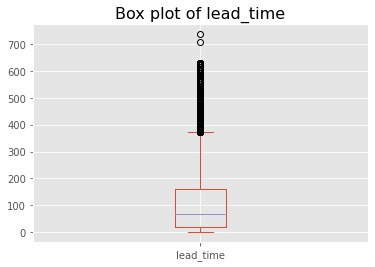

In [ ]:
dfbh['lead_time'].plot(kind='box',)
plt.title('Box plot of lead_time', size=16)
plt.show()

Text(0.5, 1.0, 'Box plot of lead_time')

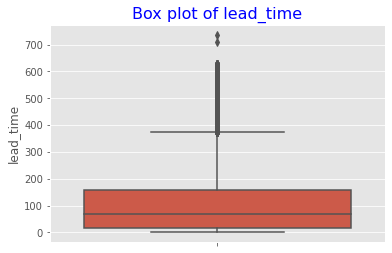

In [ ]:
sns.boxplot(data=dfbh, y='lead_time', orient='v').set_title("Box plot of lead_time", size=16, color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


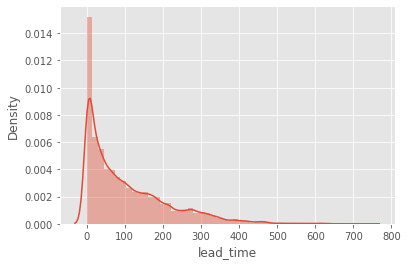

In [ ]:
sns.distplot(dfbh['lead_time'])

Based one the graphic above we have outlier. We have to do outlier handling

---



In [ ]:
Q1=dfbh['lead_time'].quantile(0.25)
Q3=dfbh['lead_time'].quantile(0.75)
IQR=Q3-Q1
print('Q1 =',Q1)
print('Q3 =',Q3)
print('IQR = ',IQR)

Q1 = 18.0
Q3 = 160.0
IQR =  142.0


In [ ]:
max_IQR=Q3+0.5*Q3
min_IQR=Q1-0.5*Q1

In [ ]:
dfbh_new = dfbh[(dfbh["lead_time"] < max_IQR) & (dfbh["lead_time"] > min_IQR)]

In [ ]:
dfbh_new.shape

(82647, 35)

In [ ]:
dfbh_new.reset_index(drop=True, inplace=True)

In [ ]:
dfbh_new.shape

(82647, 35)

In [ ]:
dfbh_new.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
1,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
3,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
4,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


Text(0.5, 1.0, 'Box plot of lead_time')

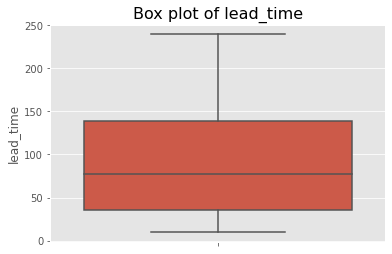

In [ ]:
sns.boxplot(y=dfbh_new['lead_time']).set_title("Box plot of lead_time", size=16)

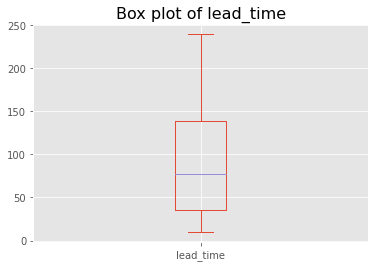

In [ ]:
from seaborn.rcmod import set_style
dfbh_new['lead_time'].plot(kind='box')
plt.title('Box plot of lead_time', size=16)
plt.show()

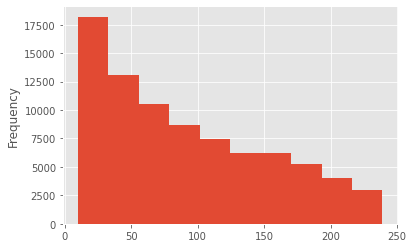

In [ ]:
dfbh_new['lead_time'].plot(kind='hist')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


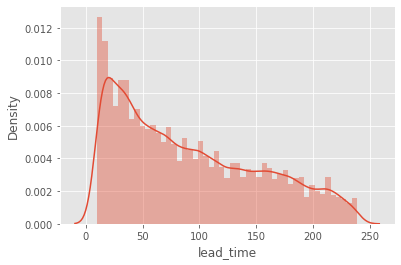

In [ ]:
sns.distplot(dfbh_new['lead_time'])

In [ ]:
dfbh_new['arrival_date_month'].value_counts()

8     9878
7     8974
4     8761
5     8601
6     7957
3     7078
10    7069
9     6390
2     5364
12    4637
11    4487
1     3451
Name: arrival_date_month, dtype: int64

In [ ]:
dfbh_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82647 entries, 0 to 82646
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           82647 non-null  object 
 1   is_canceled                     82647 non-null  int64  
 2   lead_time                       82647 non-null  int64  
 3   arrival_date_year               82647 non-null  int64  
 4   arrival_date_month              82647 non-null  object 
 5   arrival_date_week_number        82647 non-null  int64  
 6   arrival_date_day_of_month       82647 non-null  int64  
 7   stays_in_weekend_nights         82647 non-null  int64  
 8   stays_in_week_nights            82647 non-null  int64  
 9   adults                          82647 non-null  int64  
 10  children                        82647 non-null  float64
 11  babies                          82647 non-null  int64  
 12  meal                            

In [ ]:
dfbh_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82647 entries, 0 to 82646
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           82647 non-null  object 
 1   is_canceled                     82647 non-null  int64  
 2   lead_time                       82647 non-null  int64  
 3   arrival_date_year               82647 non-null  int64  
 4   arrival_date_month              82647 non-null  int64  
 5   arrival_date_week_number        82647 non-null  int64  
 6   arrival_date_day_of_month       82647 non-null  int64  
 7   stays_in_weekend_nights         82647 non-null  int64  
 8   stays_in_week_nights            82647 non-null  int64  
 9   adults                          82647 non-null  int64  
 10  children                        82647 non-null  float64
 11  babies                          82647 non-null  int64  
 12  meal                            

Find out the data distribution between "lead_time" with "arrival_date_month"

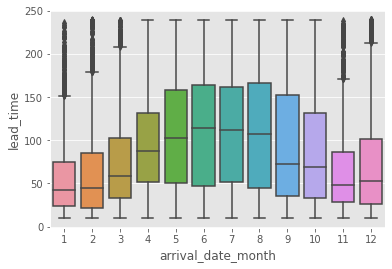

In [ ]:
sns.boxplot(x="arrival_date_month", y='lead_time',data=dfbh_new)

We found that on January, February,March, November and December there are many outlier data. It indicate that int that months some people has special objective or reason to take booking time abnormal.

In [ ]:
cats=['meal','country','market_segment','distribution_channel','reserved_room_type',
      'assigned_room_type','deposit_type','customer_type','reservation_status',
      'reservation_status_date','email','name', 'phone-number','credit_card']
dfbh_new[cats].describe()

,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,email,name,phone-number,credit_card
count,82647,82647,82647,82647,82647,82647,82647,82647,82647,82647,82647,82647,82647,82647
unique,5,164,7,5,8,10,3,4,3,917,80897,61005,82647,8997
top,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-11-25,Michael.C@gmail.com,Robert Smith,364-656-8427,************6742
freq,62676,28907,43846,71689,56946,50189,74064,63040,50344,681,6,37,1,22


In [ ]:
sns.pairplot(dfbh_new, hue='arrival_date_month')

ValueError: ignored

We woud like to see the linear regration between arrival_date_month vs lead_time. There for we transform to array shape for that coloumn

In [ ]:
dfbh_newg=round(dfbh_new.groupby(['arrival_date_month'])['lead_time'].mean().reset_index(),2)
dfbh_newg.head(12)

,arrival_date_month,lead_time
0,1,57.42
1,2,59.64
2,3,73.27
3,4,94.32
4,5,106.40
5,6,110.35
6,7,109.03
7,8,109.08
8,9,93.48
9,10,86.81


In [ ]:
arrival_month=dfbh_newg['arrival_date_month'].tolist()
arrival_month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
l_time=dfbh_newg['lead_time'].tolist()
l_time

[57.42,
 59.64,
 73.27,
 94.32,
 106.4,
 110.35,
 109.03,
 109.08,
 93.48,
 86.81,
 64.81,
 70.0]

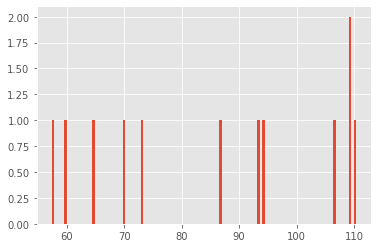

In [ ]:
from seaborn.distributions import kdeplot
plt.hist(l_time, bins=120)
plt.show()

We can see the distribution lead time (mean) for each month as below

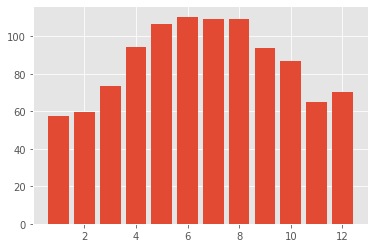

In [ ]:
plt.bar(height=l_time,x=arrival_month )
plt.show()

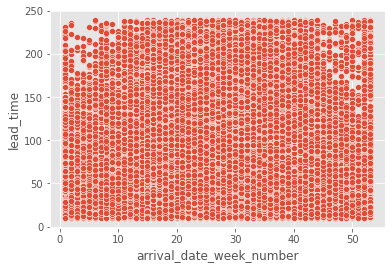

In [ ]:
sns.scatterplot(x='arrival_date_week_number',y='lead_time',data=dfbh_new)
plt.show()

KeyError: ignored

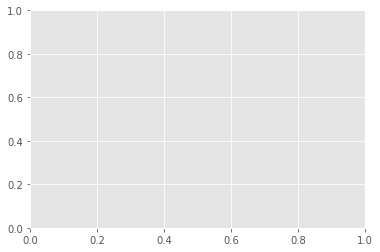

In [ ]:
dfbh_newg.plot(kind='scatter', x='arrival_month', y='l_time')
plt.title('Comparation lead time and arrival month')
plt.xlabel('Month')
plt.ylabel('Lead Time(days)')
plt.xlim(0,15)
plt.ylim(0,350)
plt.grid(True)
plt.show()

In [ ]:
dfbh_new1=dfbh_new[dfbh_new['arrival_date_month'] <2]
dfbh_new1

In [ ]:
dfbh_new1['arrival_date_month'].value_counts()

1    3451
Name: arrival_date_month, dtype: int64

In [ ]:
dfbh_new2=dfbh_new[dfbh_new['arrival_date_month'] ==2]
dfbh_new2

In [ ]:
dfbh_new2['arrival_date_month'].value_counts()

2    5364
Name: arrival_date_month, dtype: int64

In [ ]:
dfbh['reservation_status_date']=pd.to_datetime(dfbh['reservation_status_date'])

In [ ]:
dfbh['reservation_status_date'].head(20)

In [ ]:
dfbh['resrv_year']=dfbh['reservation_status_date'].dt.year
dfbh['resrv_month']=dfbh['reservation_status_date'].dt.month
dfbh['resrv_day']=dfbh['reservation_status_date'].dt.day
dfbh

In [ ]:
dfbh.drop(columns=['reservation_status_date'], axis=1, inplace=True)

In [ ]:
dfbh

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119381,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,Check-Out,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,2017,9,6
119382,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,2,Check-Out,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,2017,9,7
119383,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,4,Check-Out,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,2017,9,7
119384,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,Check-Out,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,2017,9,7


In [ ]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119386 entries, 0 to 119385
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal            

In [ ]:
dfbh['resrv_year'].isna().sum()

0

In [ ]:
dfbh['resrv_month'].isna().sum()

0

In [ ]:
dfbh['resrv_day'].isna().sum()

0

In [ ]:
dfbh['resrv_year'].value_counts()

2016    57797
2017    36483
2015    24929
2014      181
Name: resrv_year, dtype: int64

In [ ]:
dfbh['resrv_month'].value_counts()

7     12106
8     11249
10    11143
1     10681
5     10304
3     10230
4      9999
2      9498
9      9403
6      9278
11     8099
12     7400
Name: resrv_month, dtype: int64

In [ ]:
dfbh['resrv_day'].value_counts()

15    1300
29    1273
12    1271
17    1260
19    1256
21    1215
26    1208
20    1203
18    1194
9     1174
6     1164
2     1158
3     1147
30    1136
4     1127
16    1117
11    1107
28    1105
10    1102
22    1080
8     1077
27    1075
5     1063
23    1050
25    1049
13    1047
24    1035
14    1033
1      988
7      934
31     628
Name: resrv_day, dtype: int64

In [ ]:
dfbh['resrv_year'].fillna(2016.0,inplace=True)

In [ ]:
dfbh['resrv_month'].fillna(1.0,inplace=True)

In [ ]:
dfbh['resrv_day'].fillna(21.0, inplace=True)

In [ ]:
dfbh['resrv_year'].isna().sum()

0

In [ ]:
dfbh['resrv_day'].isna().sum()

0

In [ ]:
dfbh['resrv_year']=dfbh['resrv_year'].astype('int64')

In [ ]:
dfbh['resrv_month']=dfbh['resrv_month'].astype('int64')

In [ ]:
dfbh['resrv_day']=dfbh['resrv_day'].astype('int64')

In [ ]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
dfbh.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015,7,3
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263,2015,7,3
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,Check-Out,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994,2015,7,3
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,1,Check-Out,William Velez,Velez_William@mail.com,286-669-4333,************8729,2015,7,3
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,1,Canceled,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,2015,5,6
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,0,Canceled,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,2015,4,22


In [ ]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('January','1')

In [ ]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('February','2')

In [ ]:
dfbh['arrival_date_month']=dfbh['arrival_date_month'].str.replace('March','3')

In [ ]:
dfbh['arrival_date_month'].head(20)

0     7
1     7
2     7
3     7
4     7
5     7
6     7
7     7
8     7
9     7
10    7
11    7
12    7
13    7
14    7
15    7
16    7
17    7
18    7
19    7
Name: arrival_date_month, dtype: object

In [ ]:
dfbh[~dfbh['arrival_date_month'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,0,Check-Out,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,2017,9,6
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,2,Check-Out,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,2017,9,7
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,4,Check-Out,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,2017,9,7
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,0,Check-Out,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,2017,9,7


In [ ]:
dfbh['arrival_date_month'].value_counts()

8     13877
7     12661
5     11791
10    11160
4     11089
6     10939
9     10508
3      9794
2      8068
11     6794
12     6780
1      5929
Name: arrival_date_month, dtype: int64

In [ ]:
dfbh[~dfbh['arrival_date_month'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,0,Check-Out,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,2017,9,6
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,2,Check-Out,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,2017,9,7
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,4,Check-Out,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,2017,9,7
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,0,Check-Out,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,2017,9,7


In [ ]:
dfbh=dfbh.astype({'arrival_date_month':'int'})

In [ ]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
dfbh.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,resrv_year,resrv_month,resrv_day
count,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,...,34576.000000,27074.000000,2833.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000,34576.000000
mean,0.321610,89.959654,2015.982097,6.655368,27.699069,15.749075,1.163177,3.067301,1.857531,0.123496,...,0.270419,215.866219,237.584539,0.574387,89.576216,0.130235,0.578407,2015.947594,6.349983,15.916532
std,0.467101,96.738557,0.680222,3.359076,14.766051,8.854075,1.146826,2.460766,0.732989,0.438912,...,0.695977,85.316193,124.267506,7.766339,58.639576,0.343204,0.790168,0.669273,3.541616,8.758703
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,0.000000,10.000000,2016.000000,4.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,240.000000,154.000000,0.000000,48.000000,0.000000,0.000000,2015.000000,3.000000,8.000000
50%,0.000000,53.000000,2016.000000,7.000000,29.000000,16.000000,1.000000,3.000000,2.000000,0.000000,...,0.000000,240.000000,223.000000,0.000000,70.870000,0.000000,0.000000,2016.000000,7.000000,16.000000
75%,1.000000,148.000000,2016.000000,9.000000,40.000000,24.000000,2.000000,5.000000,2.000000,0.000000,...,0.000000,242.000000,329.000000,0.000000,115.200000,0.000000,1.000000,2016.000000,10.000000,23.000000
max,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,17.000000,531.000000,543.000000,185.000000,508.000000,8.000000,5.000000,2017.000000,12.000000,31.000000


In [ ]:
dfbh['phone-number']=dfbh['phone-number'].str.replace('-','')

In [ ]:
dfbh['phone-number'].head(20)

0     6697921661
1     8586376955
2     6528852745
3     3646568427
4     7132265883
5     1902716743
6     4203325209
7     2866694333
8     3417265787
9     3166486176
10    8338877898
11    8043834080
12    2110712173
13    4350758409
14    7907467471
15    6493845387
16    3314308824
17    5733069938
18    4664242102
19    8966421049
Name: phone-number, dtype: object

In [ ]:
dfbh['phone-number'].value_counts()

6697921661    1
9513266252    1
4462288858    1
3252247726    1
4505664040    1
             ..
1953217724    1
7839427089    1
4259448128    1
8959519632    1
4228046403    1
Name: phone-number, Length: 119390, dtype: int64

In [ ]:
dfbh['phone-number'].isna().sum()

0

In [ ]:
#dfbh['phone-number'].fillna('6697921661', inplace=True)

In [ ]:
dfbh[~dfbh['phone-number'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,6697921661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,8586376955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,6528852745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,3646568427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,7132265883,************5498,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,0,Check-Out,Claudia Johnson,Claudia.J@yahoo.com,4030925582,************8647,2017,9,6
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,2,Check-Out,Wesley Aguilar,WAguilar@xfinity.com,2387630612,************4333,2017,9,7
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,4,Check-Out,Mary Morales,Mary_Morales@hotmail.com,3955184100,************1821,2017,9,7
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,0,Check-Out,Caroline Conley MD,MD_Caroline@comcast.net,5315281017,************7860,2017,9,7


In [ ]:
dfbh=dfbh.astype({'phone-number':'int'})

In [ ]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
dfbh.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,credit_card,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,6697921661,************4322,2015,7,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,8586376955,************9157,2015,7,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,6528852745,************3734,2015,7,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,3646568427,************5677,2015,7,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,Linda Hines,LHines@verizon.com,7132265883,************5498,2015,7,3


In [ ]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
dfbh.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [ ]:
dfbh['agent'].isna().sum()

16340

In [ ]:
dfbh['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [ ]:
dfbh['children'].isna().sum()

4

In [ ]:
dfbh['country'].isna().sum()

488

In [ ]:
dfbh['company'].isna().sum()

112593

In [ ]:
dfbh['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [ ]:
dfbh['agent'].fillna(9.0, inplace=True)

In [ ]:
dfbh['agent'].isna().sum()

0

In [ ]:
dfbh['children'].replace(np.nan,dfbh['children'].mean(), inplace=True)

In [ ]:
dfbh['children'].isna().sum()

0

In [ ]:
dfbh['country'].head(20)

0     PRT
1     PRT
2     GBR
3     GBR
4     GBR
5     GBR
6     PRT
7     PRT
8     PRT
9     PRT
10    PRT
11    PRT
12    USA
13    ESP
14    PRT
15    IRL
16    PRT
17    IRL
18    FRA
19    GBR
Name: country, dtype: object

In [ ]:
dfbh['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
dfbh['country'].fillna('PRT', inplace=True)

In [ ]:
dfbh['country'].isna().sum()

0

In [ ]:
dfbh.drop(columns=['credit_card'],axis=1, inplace=True)

In [ ]:
dfbh.drop('credit_card', axis=1, inplace=True)

In [ ]:
dfbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
dfbh.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,name,email,phone-number,resrv_year,resrv_month,resrv_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0.00,0,0,Check-Out,Ernest Barnes,Ernest.Barnes31@outlook.com,6697921661,2015,7,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0.00,0,0,Check-Out,Andrea Baker,Andrea_Baker94@aol.com,8586376955,2015,7,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,75.00,0,0,Check-Out,Rebecca Parker,Rebecca_Parker@comcast.net,6528852745,2015,7,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,75.00,0,0,Check-Out,Laura Murray,Laura_M@gmail.com,3646568427,2015,7,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,98.00,0,1,Check-Out,Linda Hines,LHines@verizon.com,7132265883,2015,7,3
5,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,98.00,0,1,Check-Out,Jasmine Fletcher,JFletcher43@xfinity.com,1902716743,2015,7,3
6,Resort Hotel,0,0,2015,7,27,1,0,2,2,...,107.00,0,0,Check-Out,Dylan Rangel,Rangel.Dylan@comcast.net,4203325209,2015,7,3
7,Resort Hotel,0,9,2015,7,27,1,0,2,2,...,103.00,0,1,Check-Out,William Velez,Velez_William@mail.com,2866694333,2015,7,3
8,Resort Hotel,1,85,2015,7,27,1,0,3,2,...,82.00,0,1,Canceled,Steven Murphy,Steven.Murphy54@aol.com,3417265787,2015,5,6
9,Resort Hotel,1,75,2015,7,27,1,0,3,2,...,105.50,0,0,Canceled,Michael Moore,MichaelMoore81@outlook.com,3166486176,2015,4,22


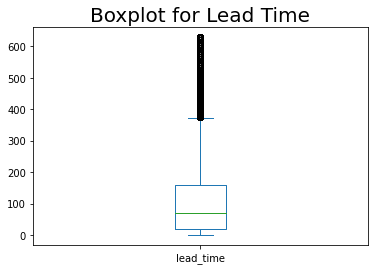

In [ ]:
dfbh['lead_time'].plot(kind='box')
plt.title('Boxplot for Lead Time', size=20)
plt.show()

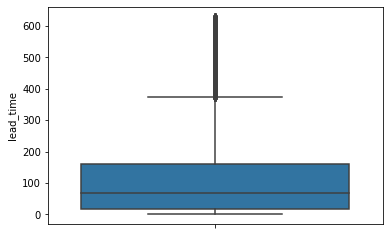

In [ ]:
sns.boxplot(y=dfbh['lead_time'])

In [ ]:
print('min_IQR=',min_IQR)

min_IQR= -195.0


In [ ]:
print('max_IQR=',max_IQR)

max_IQR= 373.0


In [ ]:
if (nilai_min < min_IQR):
  print('Low outlier is found <', min_IQR)
  print('Low Outlier Index :', list(dfbh[dfbh['lead_time'] < min_IQR].index))

In [ ]:
if (nilai_max > max_IQR):
    print('High outlier is found >', max_IQR)
    print('High outlier Index : ', list(dfbh[dfbh['lead_time'] > max_IQR].index))

High outlier is found > 373.0
High outlier Index :  [7847, 7848, 7849, 7850, 7866, 7898, 7904, 8045, 8122, 8124, 8127, 8200, 8220, 8221, 8223, 8224, 8271, 8272, 8273, 8274, 8275, 8276, 8277, 8278, 8279, 8280, 8281, 8283, 8284, 8285, 8286, 8304, 8305, 8306, 8307, 8308, 8309, 8310, 8311, 8312, 8313, 8314, 8315, 8316, 8321, 8322, 8323, 8324, 8328, 8329, 8330, 8331, 8332, 8395, 8397, 8399, 8400, 8419, 8421, 8422, 8423, 8425, 8428, 8505, 8506, 8546, 8547, 8549, 8550, 8551, 8552, 8554, 8555, 8556, 8557, 8558, 8559, 8560, 8561, 8562, 8563, 8565, 8566, 8567, 8568, 8569, 8570, 8571, 8572, 8573, 8574, 8575, 8576, 8577, 8578, 8579, 8580, 8581, 8582, 8583, 8584, 8585, 8586, 8587, 8589, 8590, 8591, 8592, 8593, 8594, 8595, 8596, 8597, 8598, 8599, 8600, 8603, 8613, 8617, 8618, 8619, 8620, 8621, 8622, 8623, 8624, 8625, 8626, 8627, 8628, 8629, 8630, 8631, 8632, 8633, 8634, 8635, 8637, 8638, 8640, 8641, 8642, 8643, 8644, 8645, 8646, 8800, 8825, 8857, 8888, 8895, 8904, 8905, 8906, 8907, 8910, 8911, 8915,

In [ ]:
dfbh.drop([5704, 5705, 5707, 5708, 5712, 5713, 5714, 5715, 5716, 5717, 6829, 6920, 7318, 7790, 7811, 7846],axis=0, inplace=True)

In [ ]:
dfbh.drop([1,890,4182],axis=0, inplace=True)

In [ ]:
dfbh.drop([225,1516, 1672],axis=0, inplace=True)

In [ ]:
dfbh.reset_index(drop=True, inplace=True)

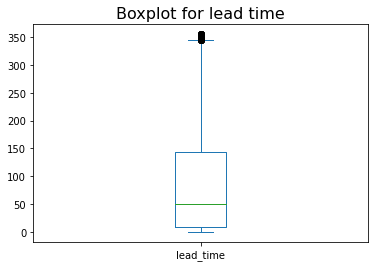

In [ ]:
dfbh['lead_time'].plot(kind='box')
plt.title('Boxplot for lead time', size=16)
plt.show()

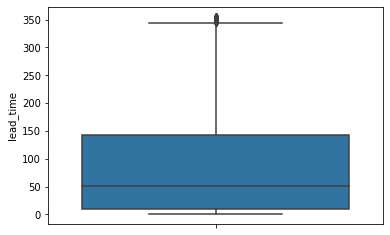

In [ ]:
sns.boxplot(y=dfbh['lead_time'])